In [1]:
import pandas as pd
import numpy as np
import qiime2 as q2
import pickle
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# see note below
#from qiime2.plugins.mmvec.actions import paired_omics, summarize_single                                   
#from gemelli.rpca import joint_rpca, rpca
from biom import Table

%matplotlib inline

### FINRISK time was produced on a compute cluster due to the time and memory requirements


In [12]:
times_samples_df = pd.read_csv('../../data/case-studies/finrisk/times-bench-real.csv', index_col=0)

/var/folders/wc/r9njmvn106j5gvr496l3xw65jl16p6/T/ipykernel_55675/1404864410.py:16: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 10**4)


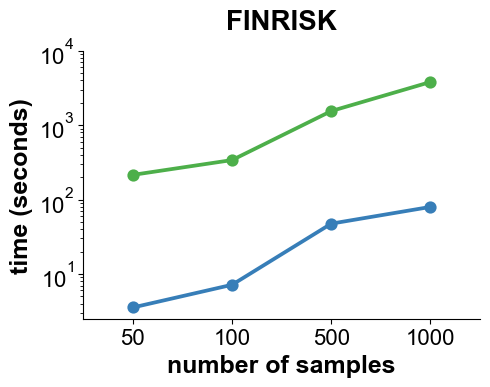

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

pal_ = {'MMvec':'#4daf4a', 'Joint-RPCA':'#377eb8'}

sns.pointplot(x='n-samples', y='time', hue='method', 
              data=times_samples_df[times_samples_df['n-samples'] < 2000], 
              palette=pal_, ax=ax)

ax.set_title('FINRISK', color='black', weight='bold', 
             fontsize=20, fontname='Arial', y=1.05)
ax.set_yscale('log')
ax.set_facecolor('white')
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0, 10**4)

for child in ax.get_children():
    if isinstance(child, matplotlib.spines.Spine):
        child.set_color('black')

for tick in ax.get_xticklabels():
    tick.set_fontproperties('arial')
    tick.set_color("black")
    tick.set_fontsize(16)

for tick in ax.get_yticklabels():
    tick.set_fontproperties('arial')
    tick.set_color("black")
    tick.set_fontsize(16)

ax.set_ylabel('time (seconds)', color='black', 
              weight='bold', fontsize=18, fontname='Arial')
ax.set_xlabel('number of samples', color='black',
              weight='bold', fontsize=18, fontname='Arial')
                  
ax.legend_.remove()

plt.tight_layout()

plt.savefig('../../results/figure-3C.pdf', dpi=600, 
                bbox_inches='tight',
                facecolor=fig.get_facecolor(), 
                edgecolor='none')
plt.savefig('../../results/figure-3C.png', dpi=600, 
                bbox_inches='tight',
                facecolor=fig.get_facecolor(), 
                edgecolor='none')

plt.show()

In [4]:
"""
Note: This installation is complicated by MMvec and up-to-date QIIME2 not being compatible so just import from file.

User can re-run if they would like by making a downgraded QIIME2 env. See MMvecs github page for more info.
"""

"""
import time

times_samples = {}
CV_summaries = {}

for n_samp, tables_tmp in simulations_by_sample_size.items():

    # mmvec has the same train/test labels
    # they are just capitalized...
    metadata_tmp = tables_tmp[0][-1]
    metadata_tmp.index.name = 'sample_name'
    
    # run RPCA (default)
    time_start = time.perf_counter()
    ord_tmp, corr_tmp, dist_tmp = joint_rpca(tables_tmp[1],
                                             max_iterations=15, 
                                             metadata=metadata_tmp,
                                             train_test_column='train_test')
    time_elapsed = (time.perf_counter() - time_start)
    times_samples[(n_samp, 'Joint-RPCA')] = [time_elapsed]
    CV_summaries[(n_samp, 'Joint-RPCA')] = dist_tmp

    # run MMvec (default)
    t1 = q2.Artifact.import_data('FeatureTable[Frequency]', tables_tmp[1][0])
    t2 = q2.Artifact.import_data('FeatureTable[Frequency]', tables_tmp[1][1])
    time_start = time.perf_counter()
    mmvec_res = paired_omics(t1, t2, summary_interval=1,
                             metadata=q2.Metadata(metadata_tmp),
                             training_column='train_test_mmvec')
    time_elapsed = (time.perf_counter() - time_start)
    times_samples[(n_samp, 'MMvec')] = [time_elapsed]
    CV_summaries[(n_samp, 'MMvec')] = mmvec_res.model_stats.view(q2.Metadata).to_dataframe()

#only save once to make it easier to exactly reproduce
with open('../../data/simulations/time_and_breakpoint/simulations_time_results_time.pickle', 'wb') as handle:
   pickle.dump(time_elapsed, handle, protocol=pickle.HIGHEST_PROTOCOL)
#only save once for to make it easier to exactly reproduce. 
with open('../../data/simulations/time_and_breakpoint/simulations_time_results_cv.pickle', 'wb') as handle:
   pickle.dump(CV_summaries, handle, protocol=pickle.HIGHEST_PROTOCOL)
times_samples_df = pd.DataFrame(times_samples).T.reset_index()
times_samples_df.columns = ['n-samples', 'method', 'time']
times_samples_df.to_csv('../../results/simulations/breakpoint/time-benchmark.csv')
"""

"\nimport time\n\ntimes_samples = {}\nCV_summaries = {}\n\nfor n_samp, tables_tmp in simulations_by_sample_size.items():\n\n    # mmvec has the same train/test labels\n    # they are just capitalized...\n    metadata_tmp = tables_tmp[0][-1]\n    metadata_tmp.index.name = 'sample_name'\n    \n    # run RPCA (default)\n    time_start = time.perf_counter()\n    ord_tmp, corr_tmp, dist_tmp = joint_rpca(tables_tmp[1],\n                                             max_iterations=15, \n                                             metadata=metadata_tmp,\n                                             train_test_column='train_test')\n    time_elapsed = (time.perf_counter() - time_start)\n    times_samples[(n_samp, 'Joint-RPCA')] = [time_elapsed]\n    CV_summaries[(n_samp, 'Joint-RPCA')] = dist_tmp\n\n    # run MMvec (default)\n    t1 = q2.Artifact.import_data('FeatureTable[Frequency]', tables_tmp[1][0])\n    t2 = q2.Artifact.import_data('FeatureTable[Frequency]', tables_tmp[1][1])\n    time_start

In [14]:
# load results
# with open('../../data/simulations/breakpoint/simulations_time_results_time.pickle', 'rb') as handle:
#     time_elapsed = pickle.load(handle)
# with open('../../data/simulations/breakpoint/simulations_time_results_cv.pickle', 'rb') as handle:
#     CV_summaries = pickle.load(handle)
times_samples_df = pd.read_csv('../../data/simulations/breakpoint/time-benchmark.csv')

/var/folders/wc/r9njmvn106j5gvr496l3xw65jl16p6/T/ipykernel_55675/364486887.py:18: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 10**4)


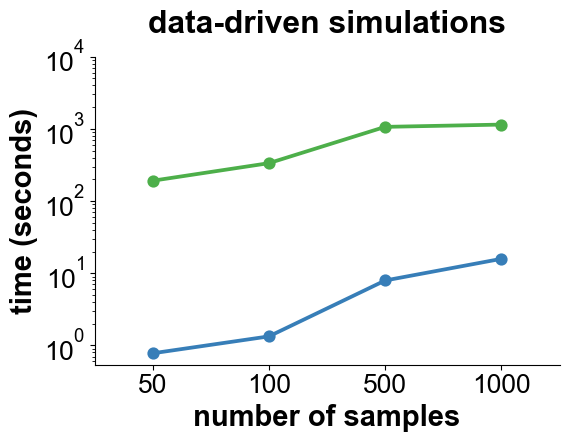

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

pal_ = {'MMvec':'#4daf4a', 'Joint-RPCA':'#377eb8'}

sns.pointplot(x='n-samples', y='time', hue='method', 
              data=times_samples_df, 
              palette=pal_, ax=ax)

ax.set_title('data-driven simulations', color='black', y=1.05,
             weight='bold', fontsize=23, fontname='Arial')
ax.set_yscale('log')
ax.set_facecolor('white')
ax.set_axisbelow(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.set_ylim(0, 10**4)

for child in ax.get_children():
    if isinstance(child, matplotlib.spines.Spine):
        child.set_color('black')

for tick in ax.get_xticklabels():
    tick.set_fontproperties('arial')
    tick.set_color("black")
    tick.set_fontsize(19)

for tick in ax.get_yticklabels():
    tick.set_fontproperties('arial')
    tick.set_color("black")
    tick.set_fontsize(19)

ax.set_ylabel('time (seconds)', color='black', 
              weight='bold', fontsize=21, fontname='Arial')
ax.set_xlabel('number of samples', color='black', 
              weight='bold', fontsize=21, fontname='Arial')

ax.legend_.remove()

plt.savefig('../../results/figure-3D.pdf', dpi=600, 
                bbox_inches='tight',
                facecolor=fig.get_facecolor(), 
                edgecolor='none')
plt.savefig('../../results/figure-3D.png', dpi=600, 
                bbox_inches='tight',
                facecolor=fig.get_facecolor(), 
                edgecolor='none')

plt.show()